In [11]:
import h5py
import librosa
import pydub # faster than librosa
import numpy      as np
import pandas     as pd
import time

from pytorch.coughvid_dataset import CoughvidDataset
from pytorch.test_coughvid_dataset import TestCoughvidDataset
from torch.utils.data import DataLoader, SubsetRandomSampler
from segmentation import segment_cough

#import torchvision.models as models

In [12]:
dir = 'C:/COUGHVID_public_dataset/public_dataset/'

dataset         = CoughvidDataset(dir, 'metadata_compiled.csv', get_features=False,samples_per_class=10)
feature_dataset = CoughvidDataset(dir, 'metadata_compiled.csv', get_features=True,samples_per_class=10)


### NOTE: THIS IS ALREADY IMPLEMENTED IN THE DATALOADER CLASS ###
# get only records that have a COVID status label and a cough-detected above 0.8. Loading all the files takes too long
#data = dataset.dataframe
#status = np.isin(data['status'],[0,1,2])#['healthy','symptomatic','COVID-19'])
#cough_detected = data['cough_detected'] > 0.8 # recommended threshold from https://www.nature.com/articles/s41597-021-00937-4

#labelled_data = data[ np.logical_and(status,cough_detected) ]
#dataset.dataframe = labelled_data

# load data
batch_size = 1
num_workers = 2
dataloader         = DataLoader(dataset, num_workers=num_workers)#, batch_size=batch_size)
feature_dataloader = DataLoader(feature_dataset, num_workers=num_workers)#, batch_size=batch_size)

print(str(len(dataloader)) + " matching records found.")

# takes about 16 minutes
start = time.time()
#all_data = [[audio,labels] for audio,labels in dataloader]
end = time.time()

print(f'{end-start} seconds elapsed.')

ifdl = iter(feature_dataloader)
inputs, classes   = next(ifdl)
idl  = iter(dataloader)
inputs2, classes2 = next(idl)  

Mask file C:/COUGHVID_public_dataset/public_dataset/ does not exist. Calculating masks on the fly.
20 records ready to load across 2 groups.
Mask file C:/COUGHVID_public_dataset/public_dataset/ does not exist. Calculating masks on the fly.
20 records ready to load across 2 groups.
20 matching records found.
0.0 seconds elapsed.


torch.Size([120, 50])


Text(0.5, 1.0, 'Segmentation Output')

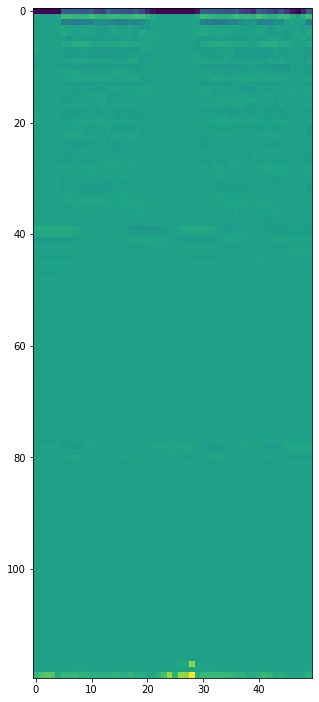

<Figure size 1008x360 with 0 Axes>

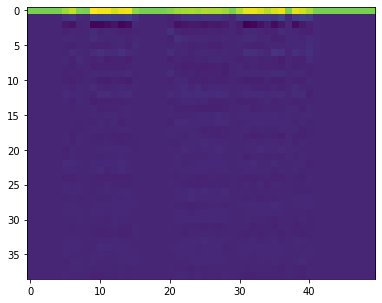

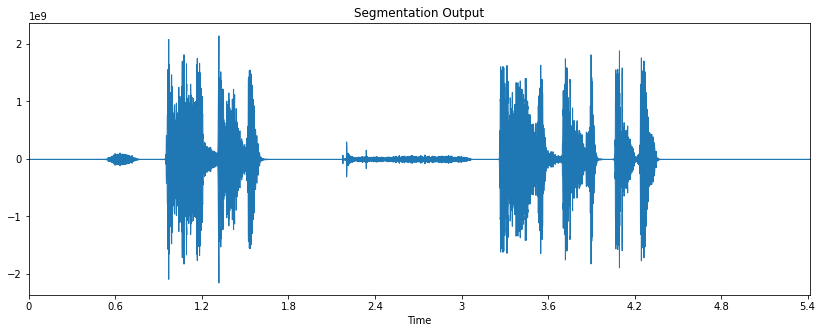

In [14]:
import matplotlib.pyplot as plt
import librosa.display

inputs, classes   = next(ifdl)
inputs2, classes2 = next(idl)  

assert classes == classes2

print(inputs[0].shape)

plt.figure(figsize=(5, 14))
plt.imshow(inputs[0])
#plt.imshow(inputs2[0])
plt.figure(figsize=(14, 5))
a = np.array(inputs2[0].tolist(),dtype='float')


cough_segments, mask = segment_cough(a,48000)
masked_audio = np.ma.masked_array(a,1-mask) 


frames = dataset.extract_frames(masked_audio)
librosa_mfcc = librosa.feature.mfcc(frames.flatten(), sr=48000, n_mfcc=39, n_fft=512, hop_length=1024, power=2,center=False)
plt.figure(figsize=(14, 5))

plt.imshow(librosa_mfcc)

plt.figure(figsize=(14, 5))

librosa.display.waveplot(masked_audio.compressed(), sr=48000)
plt.title("Segmentation Output")

In [9]:
tester = TestCoughvidDataset(dataset)
tester.test_data_loader()

Total time (sec): 36.7197642326355 (0.367197642326355 per batch, 0.367197642326355 per sample with 8 workers)


In [4]:
tester = TestCoughvidDataset(feature_dataset)
tester.test_data_loader()

Total time (sec): 25.93327045440674 (0.25933270454406737 per batch, 0.25933270454406737 per sample with 8 workers)
